In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data7size20.csv")
y = df['class']

In [2]:
img_list = []
size = 100
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),7),to_categorical((np.array(y_val)),7),to_categorical((np.array(y_test)),7)

In [4]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build(factor,late):
    size = 100
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=l2(factor),input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu',kernel_regularizer=l2(factor)))

    model.add(layers.Dense(7, activation='softmax'))
    #model.summary()
    return model
#model = model_build(1e-5, 0.3)
#model.summary()

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2
model = model_build(1e-5, 0.3)
model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
284/284 [==============================] - 29s 101ms/step - loss: 1.3039 - accuracy: 0.5252 - val_loss: 1.0066 - val_accuracy: 0.6475
Epoch 2/20
284/284 [==============================] - 27s 96ms/step - loss: 1.0282 - accuracy: 0.6350 - val_loss: 0.9498 - val_accuracy: 0.6706
Epoch 3/20
284/284 [==============================] - 27s 97ms/step - loss: 0.9690 - accuracy: 0.6531 - val_loss: 0.9207 - val_accuracy: 0.6671
Epoch 4/20
284/284 [==============================] - 27s 94ms/step - loss: 0.9319 - accuracy: 0.6639 - val_loss: 0.9382 - val_accuracy: 0.6596
Epoch 5/20
284/284 [==============================] - 27s 95ms/step - loss: 0.9117 - accuracy: 0.6678 - val_loss: 0.9039 - val_accuracy: 0.6790
Epoch 6/20
284/284 [==============================] - 27s 95ms/step - loss: 0.8804 - accuracy: 0.6794 - val_loss: 0.8308 - val_accuracy: 0.6955
Epoch 7/20
284/284 [==============================] - 26s 93ms/step - loss: 0.8257 - accuracy: 0.6948 - val_loss: 0.7957 - val_accuracy

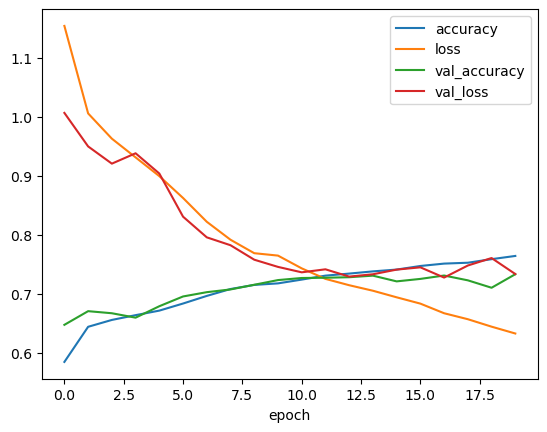

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7555245161056519
Test accuracy: 0.7267916202545166
